In [2]:
# import packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from matplotlib import cm
from scipy.stats import pearsonr

In [3]:
# import file & set index
weather = pd.read_csv('complete_weather_data_1960-2018_cleaned.csv')
weather.set_index('DATE', inplace=True)
weather.index = pd.to_datetime(weather.index)
weather.head()

,Precipitation,Snowfall,TMAX,TMIN,Fog,Heavy_fog,Thunder,Ice_pellets,Hail,Glaze,...,Blowing,High_winds,Mist,Drizzle,Freezing_dizzile,Rain,Freezing,Snow,Ice_Fog,Extreme
DATE,,,,,,,,,,,,,,,,,,,,,
1961-01-01,1.09,3.0,35.0,24.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1
1961-01-02,0.00,0.0,29.0,19.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1961-01-03,0.00,0.0,25.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1961-01-04,0.00,0.0,25.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1961-01-05,0.00,0.0,24.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [9]:
weather = weather[['Precipitation','Snowfall','TMAX','TMIN','Extreme']]
weather.head()

,Precipitation,Snowfall,TMAX,TMIN,Extreme
DATE,,,,,
1961-01-01,1.09,3.0,35.0,24.0,1
1961-01-02,0.00,0.0,29.0,19.0,0
1961-01-03,0.00,0.0,25.0,13.0,0
1961-01-04,0.00,0.0,25.0,12.0,0
1961-01-05,0.00,0.0,24.0,11.0,0


In [10]:
# check the info
weather.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 18718 entries, 1961-01-01 to 2018-01-01
Data columns (total 5 columns):
Precipitation    18718 non-null float64
Snowfall         18718 non-null float64
TMAX             18718 non-null float64
TMIN             18718 non-null float64
Extreme          18718 non-null int64
dtypes: float64(4), int64(1)
memory usage: 877.4 KB


In [11]:
# check the shape of data
print(weather.shape)

(18718, 5)


Extreme
0    12464
1     6254
Name: Snowfall, dtype: int64


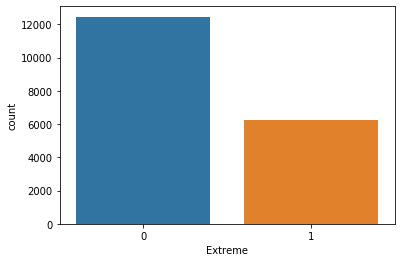

In [12]:
# count plot for extreme weather
print(weather.groupby(['Extreme']).count()['Snowfall'])
sns.countplot(data = weather,x = 'Extreme')
plt.show()

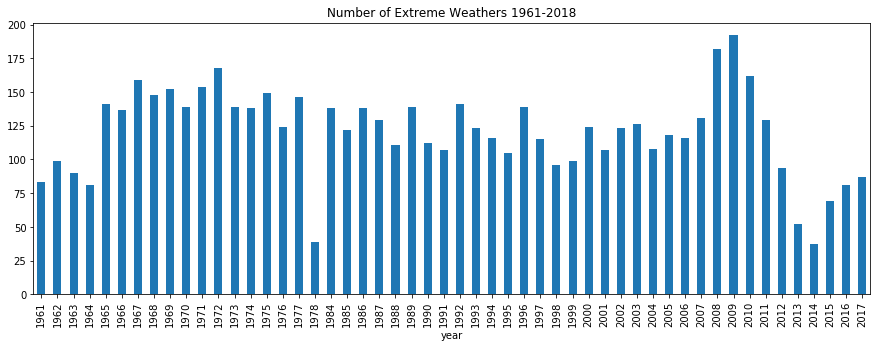

In [13]:
# chack if the number of extreme weather increases as time goes 
weather['year']= weather.index.year
extreme_weather = weather[weather['Extreme'] == 1].groupby('year').count()['Snowfall']
extreme_weather.plot(kind = 'bar', figsize=(15,5))
plt.title('Number of Extreme Weathers 1961-2018')
plt.show()

In [14]:
# check the basic statistics for other variables in both extreme whether abd normal weather 
weather.groupby('Extreme',as_index = True).agg({'Precipitation':'mean','Snowfall':'mean','TMAX':'mean','TMIN':'mean'})

,Precipitation,Snowfall,TMAX,TMIN
Extreme,,,,
0,0.048000,0.014490,58.948411,40.788190
1,0.293478,0.480556,50.026703,35.695395


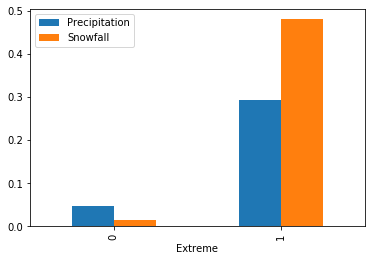

In [15]:
# visualization
weather.groupby('Extreme',as_index = True).agg({'Precipitation':'mean','Snowfall':'mean'}).plot(kind = 'bar')
plt.show()

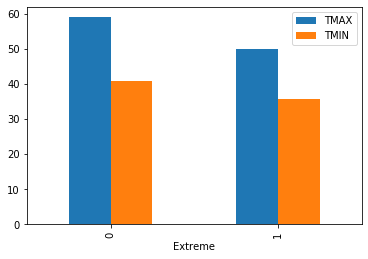

In [16]:
weather.groupby('Extreme',as_index = True).agg({'TMAX':'mean','TMIN':'mean'}).plot(kind = 'bar')
plt.show()

In [17]:
# check the correlation
print('The correlation between Precipitation and the Extreme weather is', weather['Precipitation'].corr(weather['Extreme']))
print('The correlation between Snowfall and the Extreme weather is', weather['Snowfall'].corr(weather['Extreme']))
print('The correlation between Minimum Temprature and the Extreme weather is', weather['TMIN'].corr(weather['Extreme']))
print('The correlation between Maximum Temprature and the Extreme weather is', weather['TMAX'].corr(weather['Extreme']))
print('The correlation between Snowfall and the Precipitation is', weather['Snowfall'].corr(weather['Precipitation']))


The correlation between Precipitation and the Extreme weather is 0.33790485887359273
The correlation between Snowfall and the Extreme weather is 0.2105880003365883
The correlation between Minimum Temprature and the Extreme weather is -0.1356668265332418
The correlation between Maximum Temprature and the Extreme weather is -0.21754270281445637
The correlation between Snowfall and the Precipitation is 0.21710958425776217


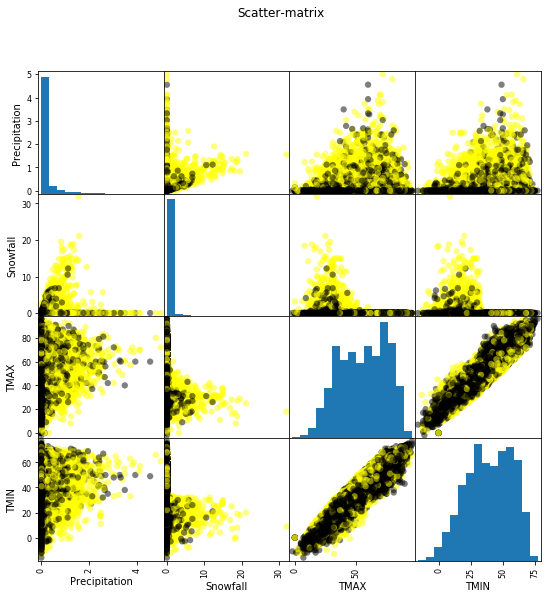

In [18]:
# Draw a matrix of scatter plots
feature_names = ['Precipitation','Snowfall','TMAX','TMIN']
X = weather[feature_names]
y = weather['Extreme']
cmap = cm.get_cmap('gnuplot')
scatter = pd.plotting.scatter_matrix(X, c = y, marker = 'o', s=40, hist_kwds={'bins':15}, figsize=(9,9), cmap = cmap)

plt.suptitle('Scatter-matrix')
plt.savefig('weather_scatter_matrix')

In [19]:
feature_names = ['Precipitation','Snowfall','TMIN']
X = weather[feature_names]

In [20]:
# Seperate the train and test set
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [21]:
# cross validation
from sklearn.model_selection import KFold
kf = KFold(n_splits = 5, shuffle=True)

### Build Models

### Support Vector Machine

In [22]:
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import cross_val_score

svm = SVC(probability=True)
svm.fit(X_train, y_train)
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svm.score(X_test, y_test)))
print(cross_val_score(svm, X, y, scoring='accuracy', cv = 10).mean())

C:\Users\Shuyu\.conda\envs\fullcombo\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy of SVM classifier on training set: 0.74
Accuracy of SVM classifier on test set: 0.74


C:\Users\Shuyu\.conda\envs\fullcombo\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Shuyu\.conda\envs\fullcombo\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Shuyu\.conda\envs\fullcombo\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Shuyu\.conda\envs\fullcombo\lib\si

0.7680243283910463


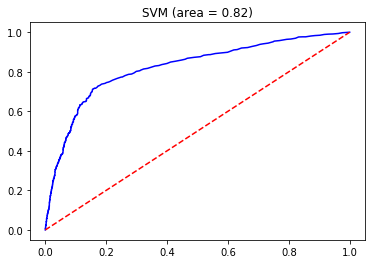

In [23]:
# ROC curves
# Probabilities for each class
probs = svm.predict_proba(X_test)
probs = probs[:, 1]
roc_value = roc_auc_score(y_test, probs)
fpr, tpr, thresholds = roc_curve(y_test, probs)
roc_auc = auc(fpr,tpr)
plt.plot(fpr, tpr, 'b')
plt.plot([0,1],[0,1],'r--')
plt.title('SVM (area = %0.2f)' % roc_value)
plt.show()

In [24]:
# confusion matrix
from sklearn import metrics
pred = svm.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred=pred)
print(cnf_matrix)

[[2412   79]
 [ 886  367]]


### Logistic Regression

In [25]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(X_train, y_train)
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(log.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(log.score(X_test, y_test)))
print(cross_val_score(log, X, y, scoring='accuracy', cv = 10).mean())

Accuracy of Logistic regression classifier on training set: 0.74
Accuracy of Logistic regression classifier on test set: 0.74


C:\Users\Shuyu\.conda\envs\fullcombo\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Shuyu\.conda\envs\fullcombo\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Shuyu\.conda\envs\fullcombo\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Shuyu\.conda\envs\fullcombo\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Shuyu\.conda\envs\fullcombo\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will 

0.7525334416928743


C:\Users\Shuyu\.conda\envs\fullcombo\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


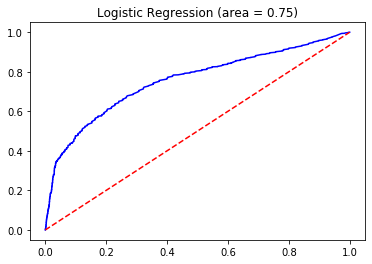

In [26]:
# ROC curves
# Probabilities for each class
probs = log.predict_proba(X_test)
probs = probs[:, 1]
roc_value = roc_auc_score(y_test, probs)
fpr, tpr, thresholds = roc_curve(y_test, probs)
roc_auc = auc(fpr,tpr)
plt.plot(fpr, tpr, 'b',label='(area = %0.2f)' % roc_value)
plt.title('Logistic Regression (area = %0.2f)' % roc_value)
plt.plot([0,1],[0,1],'r--')
plt.show()

In [27]:
# confusion matrix
from sklearn import metrics
pred = log.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred=pred)
print(cnf_matrix)

[[2418   73]
 [ 888  365]]


### K-Nearest Neighbors

In [28]:
from sklearn.neighbors import KNeighborsClassifier
knnn = KNeighborsClassifier()
knnn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knnn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knnn.score(X_test, y_test)))
print(cross_val_score(knnn, X, y, scoring='accuracy', cv = 5).mean())

Accuracy of K-NN classifier on training set: 0.82
Accuracy of K-NN classifier on test set: 0.78
0.7677609669859804


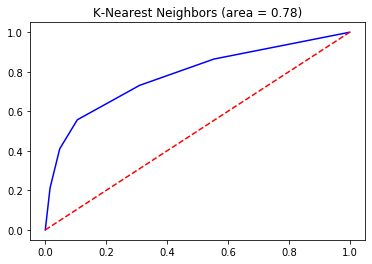

In [29]:
# ROC curves
# Probabilities for each class
probs = knnn.predict_proba(X_test)
probs = probs[:, 1]
roc_value = roc_auc_score(y_test, probs)
fpr, tpr, thresholds = roc_curve(y_test, probs)
roc_auc = auc(fpr,tpr)
plt.plot(fpr, tpr, 'b',label='(area = %0.2f)' % roc_value)
plt.title('K-Nearest Neighbors (area = %0.2f)' % roc_value)
plt.plot([0,1],[0,1],'r--')
plt.show()

In [30]:
# confusion matrix
from sklearn import metrics
pred = knnn.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred=pred)
print(cnf_matrix)

[[2229  262]
 [ 555  698]]


### Gaussian Naive Bayes

In [31]:
from sklearn.naive_bayes import GaussianNB
gnbb = GaussianNB()
gnbb.fit(X_train, y_train)
print('Accuracy of GNB classifier on training set: {:.2f}'
     .format(gnbb.score(X_train, y_train)))
print('Accuracy of GNB classifier on test set: {:.2f}'
     .format(gnbb.score(X_test, y_test)))
print(cross_val_score(gnbb, X, y, scoring='accuracy', cv = 5).mean())

Accuracy of GNB classifier on training set: 0.74
Accuracy of GNB classifier on test set: 0.74
0.7344790253395278


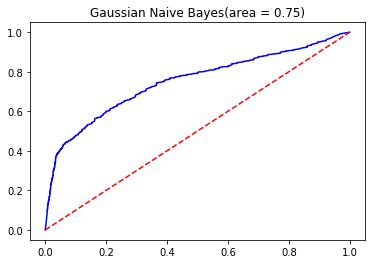

In [32]:
# ROC curves
# Probabilities for each class
probs = gnbb.predict_proba(X_test)
probs = probs[:, 1]
roc_value = roc_auc_score(y_test, probs)
fpr, tpr, thresholds = roc_curve(y_test, probs)
roc_auc = auc(fpr,tpr)

plt.plot(fpr, tpr, 'b',label='(area = %0.2f)' % roc_value)
plt.title('Gaussian Naive Bayes(area = %0.2f)' % roc_value)
plt.plot([0,1],[0,1],'r--')
plt.show()

In [33]:
# confusion matrix
from sklearn import metrics
pred = gnbb.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred=pred)
print(cnf_matrix)

[[2435   56]
 [ 927  326]]


### Random Forest

In [34]:
from sklearn.ensemble import RandomForestClassifier

# Create the model with 100 trees
rfc = RandomForestClassifier(n_estimators=100, 
                               bootstrap = True,
                               max_features = 'sqrt')
# Fit on training data
rfc.fit(X_train, y_train)
print('Accuracy of GNB classifier on training set: {:.2f}'
     .format(rfc.score(X_train, y_train)))
print('Accuracy of GNB classifier on test set: {:.2f}'
     .format(rfc.score(X_test, y_test)))
print(cross_val_score(rfc, X, y, scoring='accuracy', cv = 5).mean())

Accuracy of GNB classifier on training set: 0.86
Accuracy of GNB classifier on test set: 0.79
0.7787659542636829


In [35]:
# confusion matrix
from sklearn import metrics
pred = rfc.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred=pred)
print(cnf_matrix)

[[2274  217]
 [ 582  671]]
